In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
from PIL import Image
from matplotlib.gridspec import GridSpec

In [2]:
# Load the data
df = pd.read_csv('/kaggle/input/dubois-data-portrait-challenge/challenge-only/challenge05/data.csv')
df

,Class,Actual Average,Rent,Food,Clothes,Tax,Other
0,$100-200,139.10,19,43,28,9.9,NaN
1,$200-300,249.45,22,47,23,4.0,4.0
2,$300-400,335.66,23,43,18,4.5,11.5
3,$400-500,433.82,18,37,15,5.5,24.5
4,$500-750,547.00,13,31,17,5.0,34.0
5,$750-1000,880.00,0,37,19,8.0,36.0
6,Over $1000,1125.00,0,29,16,4.5,50.5


In [3]:
# Data preparation

# Fill Na
df = df.fillna(0)

# Modify the value of last row 
df.iloc[-1, df.columns.get_loc('Class')] = '1000 \nAND OVER'

# Set index
df = df.set_index(['Class', 'Actual Average'])

# Set the bar colors
colors = ['#161616', '#6f5776', '#d09d89', '#a8a29f', '#c5b7a4']

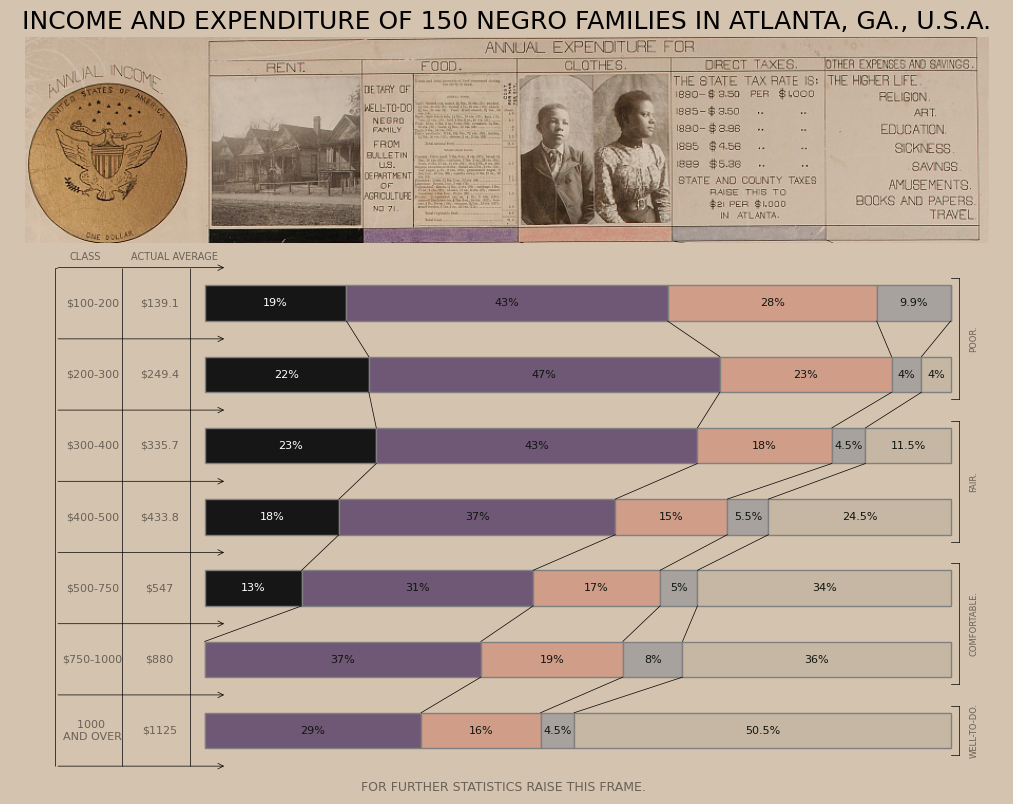

In [4]:
# Create the figure 
fig, ax = plt.subplots(figsize=(10.24, 8.14), facecolor='#d4c3ae')

# Turn the axis off
ax.set_axis_off() 

# Create subplots with gridspec
gs = GridSpec(2, 1, height_ratios=[0.75, 2], figure=fig, hspace=0)

# Create subplots' axes
ax1 = fig.add_subplot(gs[0], facecolor='#d4c3ae')
ax2 = fig.add_subplot(gs[1], facecolor='#d4c3ae')

# Load and display the image
image = Image.open("/kaggle/input/header/header.png")
image_np = np.array(image)
ax1.imshow(image_np)

# Set title
ax1.set_title('INCOME AND EXPENDITURE OF 150 NEGRO FAMILIES IN ATLANTA, GA., U.S.A.', fontsize=18)

# Get column names
colnames = df.columns

# Get values
data = df.values

# Array with cumulative sum, set the starting positions for each stack
data_cum = data.cumsum(axis=1)

# Set bar positions
bar_y_positions = range(7, 0, -1)

# Plot the bars for each category
for i, (colname, color) in enumerate(zip(colnames, colors)):  
    # Length of each stack
    widths = data[:, i] 
    # Starting position of each stack, shifted by 20
    starts = data_cum[:, i] - widths+20
    # Adjust label color
    txtcol = 'white' if color == '#161616' else '#10150f'

    # Plot the bars
    rects = ax2.barh(bar_y_positions, widths, height=0.5, left=starts, label=colname, 
                     color=color, edgecolor='grey')

    # Non-zero value bar labels with formatting
    ax2.bar_label(rects, labels=[f'{int(w)}%' if w.is_integer() and w != 0 else f'{w:.1f}%' if w != 0 else '' for w in widths],
                  color=txtcol, fontsize = 8, label_type='center')

# Dataframe with cumulative sum
df_cum = df.cumsum(axis=1) 

# Connected lines for bar position 1-7, loop over from the second row to connect bars
for j in range(1, len(df)):
    # Get cumulative values in the previous and current rows
    for x1, x2 in zip((df_cum.iloc[j-1])[:-1].values, (df_cum.iloc[j])[:-1].values):
        # Draw a line between bars if the previous cumulative value is positive
        if x1 > 0:
            ax2.plot([x1+20, x2+20], [len(bar_y_positions)+0.75-j, len(bar_y_positions)-j+0.25], linewidth=0.5, color='black')

# Row positions for the left side annotations
row_positions = np.arange(7.5, -0.5, -1)

# Set column labels for the left side annotations
col_labels = ['CLASS', 'ACTUAL AVERAGE']

# Get values for the fist column in the left side annotation
level_0_values = df.index.get_level_values(0).values  

# Get values for the second column in the left side annotation
level_1_values = df.index.get_level_values(1).values  

# Format the second column in the left side annotation
level_1_values = [f'${int(val)}' if float(val).is_integer() else f'${val:.1f}' for val in level_1_values]

# Draw grid and arrows 
for i, y in enumerate(row_positions):
    ax2.annotate('', xy=(23, y), xytext=(0, y), arrowprops=dict(arrowstyle="->", color='black', lw=0.5))    
    if i == 0:
        # Draw headers (top row)
        ax2.text(4, y + 0.15, col_labels[0], ha='center', va='center', fontsize=7, alpha=0.5)
        ax2.text(16, y + 0.15, col_labels[1], ha='center', va='center', fontsize=7, alpha=0.5)
    else:
        # Draw data rows
        ax2.text(5, y + 0.5, level_0_values[i-1], ha='center', va='center', fontsize=8, alpha=0.5)
        ax2.text(14, y + 0.5, level_1_values[i-1], ha='center', va='center', fontsize=8, alpha=0.5)    

# Vertical lines for the left side annotation
for x in [0, 9, 18]:  
    ax2.vlines(x, ymin=0.5, ymax=7.5, color='black', linewidth=0.5)

# Horizontal lines for the left side annotation
ax2.hlines(y=7.5, xmin=0, xmax=0.19, color='black', linewidth=0.5) 

# Set the coordinates for the brackets
bracket_coords = [(7.35, 5.65), (5.35, 3.65), (3.35, 1.65), (1.35, 0.65)]

# Draw the brackets in the right side annotation
for y1, y2 in bracket_coords:
    # Draw the vertical line 
    ax2.plot([121, 121], [y1, y2], color='black', linewidth=0.5)
    
    # Draw horizontal lines 
    ax2.plot([121, 120], [y1, y1], color='black', linewidth=0.5)
    ax2.plot([121, 120], [y2, y2], color='black', linewidth=0.5)

# Bottom annotation
ax2.text(60, 0.2, 'FOR FURTHER STATISTICS RAISE THIS FRAME.', ha='center', va='center', fontsize=9, alpha=0.5)

# Create text annotations rotated by 90 degrees for the right side annotation
text_y_positions = [1, 2.5, 4.5, 6.5]
texts = ['WELL-TO-DO.', 'COMFORTABLE.', 'FAIR.', 'POOR.']  
for y, text in zip(text_y_positions, texts):
    ax2.text(123, y, text, rotation=90, ha='center', va='center', fontsize=6, alpha=0.5)

# Remove ticks in all axis
for ax in fig.get_axes():
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

# Remove all spines for each axis
for ax in fig.get_axes():
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust the padding
plt.tight_layout()

# Save the figure
plt.savefig("plate31.jpg")

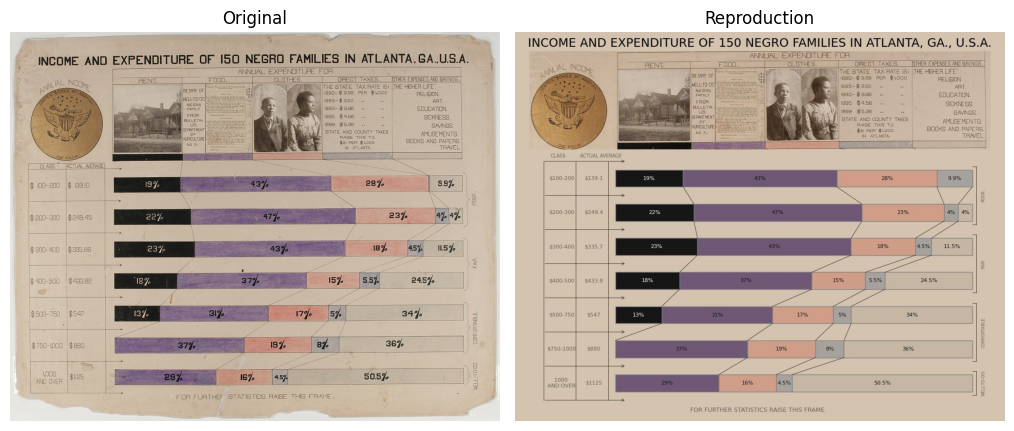

In [5]:
# Load the images
image1 = Image.open("/kaggle/input/dubois-data-portrait-challenge/challenge-only/challenge05/original-plate-31.jpg")
image2 = Image.open("plate31.jpg")

# Convert the images to a numpy array 
image_np1 = np.array(image1)
image_np2 = np.array(image2)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10.24, 8.14))

# Left subplot
ax1.imshow(image_np1)
# Turn off axis for the image
ax1.axis('off')  
# Set title
ax1.set_title('Original')

# Right subplot
ax2.imshow(image_np2)
# Turn off axis for the image
ax2.axis('off')  
# Set title
ax2.set_title('Reproduction')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Save the combined figure as a PNG file
#plt.savefig("Reproduction4.png", dpi=300)

# Show the figure
plt.show()